In [36]:
import pandas as pd
import numpy as np

# PCA

## Data Preprocessing

In [37]:
input_df = pd.read_csv("hw1_input.csv")

Normalization of the input data

In [38]:
from sklearn.preprocessing import StandardScaler

x = input_df.values
x_normalized = StandardScaler().fit_transform(x)


Control of the mean and standard deviation of normalized data

In [39]:
np.mean(x_normalized), np.std(x_normalized)

(np.float64(-3.858909780987557e-17), np.float64(1.0))

## PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_normalized)
explained_variance = pca.explained_variance_ratio_

In [41]:
print('Explained variation per principal component: {}'.format(explained_variance))


Explained variation per principal component: [0.20715348 0.11070825]


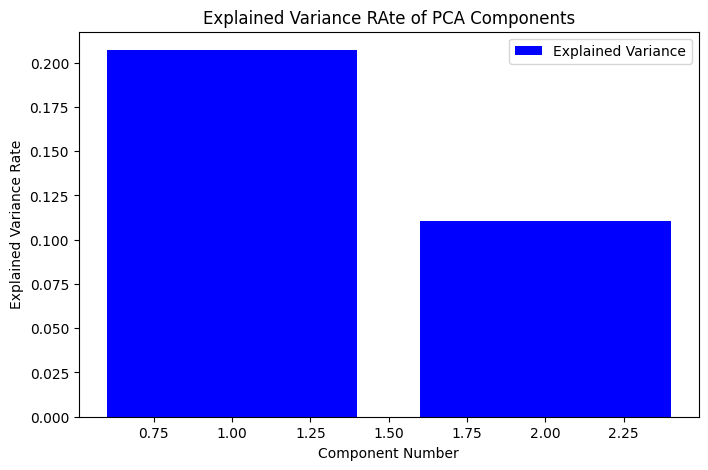

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='b', label='Explained Variance')
# plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', color='r', label='Kümülatif Açıklanan Varyans')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Rate')
plt.title('Explained Variance RAte of PCA Components')
plt.legend()
plt.show()

Variation explained by principal components is seen above and these values are so low; therefore, we will increase the component number.

In [43]:
pca_2 = PCA(n_components=11)
principalComponents_2 = pca_2.fit_transform(x_normalized)
explained_variance_2 = pca_2.explained_variance_ratio_

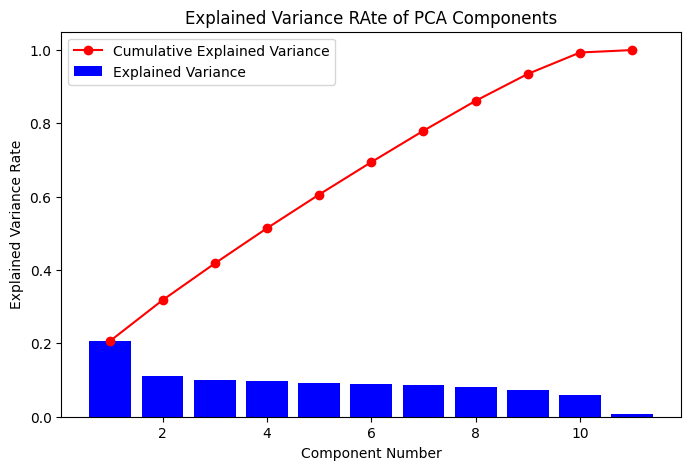

Explained variation per principal component: [0.20715348 0.31786173 0.41789557 0.51396794 0.60583873 0.69429699
 0.77995603 0.86160656 0.93500519 0.99330787 1.        ]


In [44]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_2) + 1), explained_variance_2, color='b', label='Explained Variance')
plt.plot(range(1, len(explained_variance_2) + 1), np.cumsum(explained_variance_2), marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Rate')
plt.title('Explained Variance RAte of PCA Components')
plt.legend()
plt.show()
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_2)))

The dimension of the data could not be reduced effectively by PCA because there is no component that explained variance very well. If we want to use these components, we may use first 8 components because these components explain %86 of variance.

New version of data consists of 8 components

In [45]:
pca_3 = PCA(n_components=8)
principalComponents_3 = pca_3.fit_transform(x_normalized)
explained_variance_3 = pca_3.explained_variance_ratio_

In [46]:
columns = ["PCA"+str(i) for i in range(1,9)]
pca_input_df = pd.DataFrame(data = principalComponents_3
             , columns = columns)

pca_input_df.head(5)
    

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-0.982602,1.004385,-1.516279,-2.104630,-0.546775,0.744702,-0.552818,-0.667340
1,0.248740,-0.141891,0.376193,-0.732142,-0.282065,1.368877,-0.959647,-2.041031
2,1.908395,0.083787,-0.319515,-1.120700,2.071235,-0.491458,-0.492149,-1.244033
3,-1.213149,-1.144310,-2.298673,1.459123,-1.737006,1.587619,0.433061,0.978435
4,-1.651363,0.449599,-0.306939,1.764989,0.852996,-0.355527,1.083428,0.401747


# Linear Regression

In [47]:
real_df = pd.read_csv("hw1_real.csv")
img_df = pd.read_csv("hw1_img.csv")

The main aim is to predict the magnitude; therefore, real and imaginary parts of data should be converted to magnitude as an only output.